In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("https://drive.google.com/file/d/1qfxwlgYa3eL3r6Gge7sG9fF3tLo1lUXx/view?usp=sharing")
df.head()

,"<!DOCTYPE html><html><head><meta name=""google"" content=""notranslate""><meta http-equiv=""X-UA-Compatible"" content=""IE=edge;""><style nonce=""qIUjKn_qTZpsgkf6VI3N_A"">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name=""referrer"" content=""origin""><title>train.csv - Google Drive</title><meta property=""og:title"" content=""train.csv""><meta property=""og:type"" content=""article""><meta property=""og:site_name"" content=""Google Docs""><meta property=""og:url"" content=""https://drive.google.com/file/d/1qfxwlgYa3eL3r6Gge7sG9fF3tLo1lUXx/view?usp=sharing&amp;usp=embed_facebook""><link rel=""shortcut icon"" href=""https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png""><link rel=""stylesheet"" href=""https://fonts.googleapis.com/css?family=Google+Sans:300",400,500,"700"" nonce=""qIUjKn_qTZpsgkf6VI3N_A""><link rel=""stylesheet"" href=""https://www.gstatic.com/_/apps-fileview/_/ss/k=apps-fileview.v.0Xygm-i-1ug.L.X.O/d=0/rs=AO0039tpZOrtH3lK5OokR6dp77DbIrk08A"" nonce=""qIUjKn_qTZpsgkf6VI3N_A""><script nonce=""upG1M_dnowcvEcIE-emiUw"">_docs_flag_initialData={""docs-ails"":""docs_cold""","docs-fwds:""docs_sdf""","docs-crs:""docs_crs_nfd""",docs-shdn:0,"docs-tfh:""""",info_params:{},docs-eohmo:false,...,null.193,2.3,5.2,ug,56],[[null.2,null.194,null.195,"https://www.gstatic.com/og/_/js/k=og.qtm.en_US.asUsweLQqwk.O/rt=j/m=qabr,q_dnp,qapid/exm=qaaw,qadd,qaid,qein,qhaw,qhbr,qhch,qhga,qhid,qhin,qhpr/d=1/ed=1/rs=AA2YrTvH37iHjvnJ7NPFbMaGY1OZ0tqdnw]]]]",};this.gbar_=this.gbar_||{};(function(_){var window=this;
0,try{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,var ka,sa,ya,za,Ha,Fa,Ia,Ea,Na,Sa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"_.ia=function(){return _.p(""Safari"")&&!(_.ha()...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,_.ma=function(a){var b=a.length;if(0<b){for(va...,d=0;d<b;d++)c[d]=a[d];return c}return[]};_.na=...,b){Object.isFrozen(a)||(qa?a[qa]|=b:void 0!==a...,{Jc:{value:b,configurable:!0,writable:!0,enumerable:!1}}))};_.ta=function(a){var b;qa?b...,1);return a};,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,_.va=function(a){return Array.isArray(a)?!!(_....,2)};_.xa=function(a,"b){if(!Array.isArray(a))throw Error(""z"");b?sa(a",8):Object.isFrozen(a)||(qa?a[qa]&=-9:void 0!==...,configurable:!1,writable:!1,enumerable:!1}};_.Aa=function(a,b){var c=void 0===c?!1:c;if(Array.isArray(a))r...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Before starting with the EDA let us check if there is any missing data

In [ ]:
#Check for any missing values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### As you can see there is no data missing, Hence we can proceed further.

### 2. Check the types of data set.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


* Most of the data is in float data type, Except State we'll decide what can be done to this column.

### 3. Analyze how these columns (R&D Spend , Administration , Marketing Spend , Profit) will impact in determining the Profit, Here Profit is the dependent variable

#### Here we can see the relation using data visualization techniques, or using the corr function.

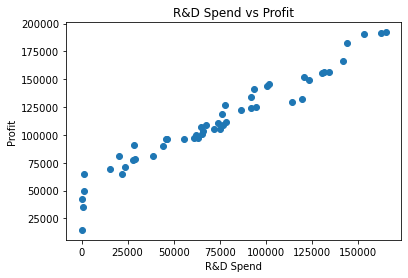

In [ ]:
# For R&D Spend
plt.scatter(x="R&D Spend", y="Profit", data=df)
plt.title("R&D Spend vs Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

* As we can see that the R&D Spend is positively correlated with the profit. 
* We can confirm that the more company spends on R&D the more profit it can make

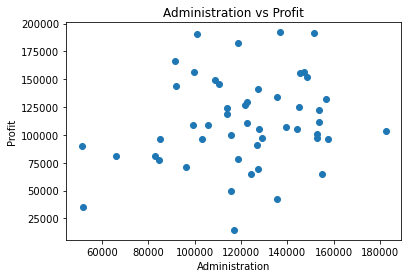

In [ ]:
# For Administration
plt.scatter(x="Administration", y="Profit", data=df)
plt.title("Administration vs Profit")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

* We can say that there is some very little correlation with the Profit
* But we cannot see the value or how stongly these variables are correlated

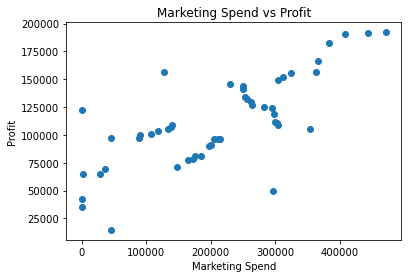

In [ ]:
plt.scatter(x="Marketing Spend", y="Profit", data=df)
plt.title("Marketing Spend vs Profit")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

* There is some positive correlation but not to that extend, hence we need to plot an corr matrix to check the correlation between the variables

In [ ]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


* As we can see that the R&D Spend and Marketing Spend are stongly correlated to profit.
* The Administration has just an correlation of 0.20

### 4. Use encoding technique(use Label Encoder or OneHotEncoder libraries) to handle with categorical variable.

In [ ]:
# First let us check the unique values of the "State" columns. 
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
# Import Label Encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['State']= label_encoder.fit_transform(df['State'])

df["State"].unique()

array([2, 0, 1])

<AxesSubplot:>

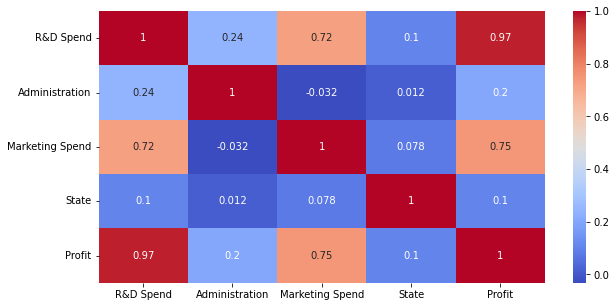

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap = "coolwarm" )

#### With heatmap we can say that Administration and State are not related with the profit

### 5. Build an OLS regression model

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, 
                                     random_state = 100)

In [ ]:
y_train = df_train.pop('Profit')
X_train = df_train

y_test = df_test.pop('Profit')
X_test = df_test

In [ ]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary()

C:\Users\MIT\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     220.0
Date:                Fri, 06 May 2022   Prob (F-statistic):           2.81e-24
Time:                        11:53:41   Log-Likelihood:                -414.35
No. Observations:                  40   AIC:                             838.7
Df Residuals:                      35   BIC:                             847.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.561e+04   6979.870      7.968      0.000    4.14e+04    6.98e+04
R&D Spend           0.8168      0.046     17.810      0.000       0.724       0.910
Administration     -0.0502      0.053     -0.954      0.346      -0.157       0.057
Marketing Spend     0.0200      0.016      1.250      0.220      -0.012       0.052
State           -1439.4323   1586.366     -0.907      0.370   -4659.927    1781.062
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.096
Skew:                          -0.036   Prob(JB):                        0.953
Kurtosis:                       2.771   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 6. Check for multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,R&D Spend,9.73
2,Marketing Spend,8.61
1,Administration,5.35
3,State,2.50


* We consider the variables generally having a value <5. If we observe the above image clearly, there are some variables we can drop, But as there are very less variables let them be.

### 7. Build an linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### 8. Find the intercept and coefficient value of the model

In [ ]:
print(regressor.intercept_)

55613.44850791521


In [ ]:
print(regressor.coef_)

[ 8.16754760e-01 -5.02134441e-02  1.99770860e-02 -1.43943225e+03]


### 9. Predict the profit using the trained model

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df_1 = pd.DataFrame({'Actual': y_test, 'pred_profit': y_pred})
df_1

,Actual,pred_profit
6,156122.51,160721.313879
36,90708.19,75223.276551
37,89949.14,92968.760516
28,103282.38,101310.903749
43,69758.98,59712.527961
49,14681.40,50641.715113
5,156991.12,162682.542019
33,96778.92,98611.870603
20,118474.03,118142.928112
42,71498.49,73048.908905


### 10. Find the value of the below asked question
* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8048.747466039189
Mean Squared Error: 170627724.9662677
Root Mean Squared Error: 13062.454783319547


### 11. Plot the graph between the Actual and the True values

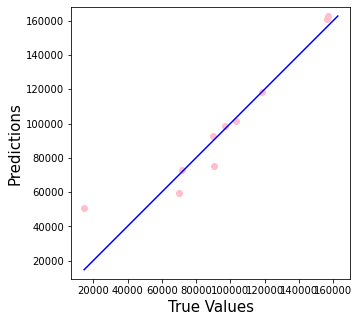

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred, c='pink')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Thank you